# <div style="text-align: center;" class="alert alert-block alert-info">This code reads a <b>CSV</b> file, processes the data and realize a __T-Test__ after **EDA**</div>

### Importing libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Extracting the data into DataFrame

In [2]:

df = pd.read_csv('crime_data_clean.csv')
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,communityname,state
0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,BerkeleyHeightstownship,NJ
1,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95,Marpletownship,PA
2,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51,Tigardcity,OR
3,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,57.86,190.93,1301.78,4142.56,271.93,NaN,306.64,NaN,Gloversvillecity,NY
4,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,32.04,112.14,728.93,8490.87,728.93,40.05,NaN,9988.79,Bemidjicity,MN


### Inspecting the data

In [4]:
# Number of rows and columns in the DataFrame
df.shape

# Information about the data
# df.info()

# Checking columns with null values
df.isna().sum().head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   population           2215 non-null   float64
 1   householdsize        2215 non-null   float64
 2   racepctblack         2215 non-null   float64
 3   racePctWhite         2215 non-null   float64
 4   racePctAsian         2215 non-null   float64
 5   racePctHisp          2215 non-null   float64
 6   agePct12t21          2215 non-null   float64
 7   agePct12t29          2215 non-null   float64
 8   agePct16t24          2215 non-null   float64
 9   agePct65up           2215 non-null   float64
 10  numbUrban            2215 non-null   float64
 11  pctUrban             2215 non-null   float64
 12  medIncome            2215 non-null   float64
 13  pctWWage             2215 non-null   float64
 14  pctWFarmSelf         2215 non-null   float64
 15  pctWInvInc           2215 non-null   f

population       0
householdsize    0
racepctblack     0
racePctWhite     0
racePctAsian     0
dtype: int64

In [5]:
# Displaying only columns with missing values along with number of missing values
miss_values_count = df.isna().sum()
print(miss_values_count[miss_values_count > 0])

# List of columns with missing values
cols_w_miss_values =[col for col in df.columns if df[col].isna().any()]
cols_w_miss_values, len(cols_w_miss_values)

rapesPerPop            208
robbbPerPop              1
assaultPerPop           13
burglPerPop              3
larcPerPop               3
autoTheftPerPop          3
arsonsPerPop            91
ViolentCrimesPerPop    221
nonViolPerPop           97
dtype: int64


(['rapesPerPop',
  'robbbPerPop',
  'assaultPerPop',
  'burglPerPop',
  'larcPerPop',
  'autoTheftPerPop',
  'arsonsPerPop',
  'ViolentCrimesPerPop',
  'nonViolPerPop'],
 9)

In [5]:
# Checking data type of columns with missing values
df[cols_w_miss_values].dtypes

rapesPerPop            float64
robbbPerPop            float64
assaultPerPop          float64
burglPerPop            float64
larcPerPop             float64
autoTheftPerPop        float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
dtype: object

In [6]:
# Columns with missing values DataFrame
df[cols_w_miss_values].head(10)

,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,0.00,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59
1,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95
2,16.60,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51
3,57.86,57.86,190.93,1301.78,4142.56,271.93,NaN,306.64,NaN
4,NaN,32.04,112.14,728.93,8490.87,728.93,40.05,NaN,9988.79
5,50.98,90.05,297.29,1386.46,5091.64,300.60,88.72,442.95,6867.42
6,13.53,30.44,182.66,372.09,974.19,487.10,57.50,226.63,1890.88
7,55.79,160.80,210.02,997.60,3691.79,205.10,14.77,439.73,4909.26
8,43.87,20.05,51.39,532.66,3946.71,258.18,10.03,115.31,4747.58
9,130.69,419.89,966.77,2221.81,5673.63,991.80,16.68,1544.24,8903.93


In [7]:
# Entire DataFrame columns
df.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'PctEmploy',
       'murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop',
       'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop',
       'ViolentCrimesPerPop', 'nonViolPerPop', 'communityname', 'state'],
      dtype='object')

## Analysis with Missing Values Rows Dropped

In [6]:
# Copying the DataFrame
rows_drop_df = df.copy()

# Dropping rows with at least 1 missing value
rows_drop_df.dropna(inplace=True)

# Checking the columns with missing value
rows_drop_df[cols_w_miss_values].isna().sum()

# Displaying number of records and features in the original DataFrame and the new DataFrame
df.shape, rows_drop_df.shape


((2215, 39), (1902, 39))

In [7]:
# Descriptive statistics of the dataset
rows_drop_df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,1.902000e+03,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,...,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,5.248226e+04,2.712077,9.380505,83.448465,2.821435,8.714664,14.414164,27.599190,13.966803,11.980478,...,5.968323,36.256099,166.765973,374.704269,1056.789642,3370.216036,483.277829,32.040573,583.694805,4942.323838
std,2.060649e+05,0.347385,13.963913,16.371499,4.737298,15.447037,4.492013,6.152525,5.888208,4.853808,...,9.065658,34.342653,236.321005,406.880859,776.604566,1957.040052,506.144184,39.578185,608.270648,2786.611455
min,1.000500e+04,1.600000,0.000000,2.680000,0.060000,0.120000,4.580000,9.380000,4.640000,1.660000,...,0.000000,0.000000,0.000000,0.000000,16.920000,77.860000,6.550000,0.000000,6.640000,116.790000
25%,1.432350e+04,2.500000,0.930000,75.762500,0.630000,0.950000,12.210000,24.362500,11.310000,8.845000,...,0.000000,11.582500,29.015000,95.705000,520.520000,1996.645000,162.492500,7.252500,164.240000,2913.280000
50%,2.268100e+04,2.660000,3.055000,89.605000,1.270000,2.425000,13.620000,26.775000,12.520000,11.830000,...,2.465000,27.080000,78.985000,234.460000,859.340000,3057.835000,310.875000,21.030000,369.315000,4479.660000
75%,4.324975e+04,2.860000,11.430000,95.957500,2.880000,8.917500,15.405000,29.200000,14.370000,14.510000,...,8.655000,51.230000,194.102500,511.350000,1375.360000,4350.987500,605.602500,43.177500,792.687500,6271.720000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,91.090000,401.350000,2264.130000,3486.140000,11881.020000,25910.550000,4968.590000,436.370000,4877.060000,27119.760000


### Visualising the distributions of income sources

In [8]:
# List of income sources columns
income_sources_cols = ['pctWWage', 'pctWFarmSelf', 
                       'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
                       'pctWRetire']

# Income sources DataFrame
income_sources_df = rows_drop_df[income_sources_cols]

#income_sources_df.set_index('medIncome', inplace=True)
income_sources_df.head()

,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire
0,89.24,1.55,70.20,23.62,1.03,18.39
1,78.99,1.11,64.11,35.50,2.75,22.85
2,82.00,1.15,55.73,22.25,2.94,14.56
5,75.78,1.00,41.15,29.31,7.12,14.09
6,79.47,0.39,47.70,30.23,5.41,17.23


In [9]:
# Examining the mean, median, standard deviation, and percentiles to understand the spread of the data
income_sources_df.describe()

,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,78.182818,0.888086,43.464774,26.582329,6.760142,16.085431
std,7.845352,0.689080,12.802307,8.252940,4.485985,4.582003
min,31.680000,0.000000,9.020000,4.810000,0.500000,3.460000
25%,73.450000,0.470000,34.202500,20.910000,3.360000,13.000000
50%,78.550000,0.700000,42.430000,26.665000,5.620000,15.700000
75%,83.757500,1.100000,52.495000,31.720000,9.097500,18.787500
max,96.620000,6.530000,89.040000,76.390000,26.920000,45.510000


<Axes: >

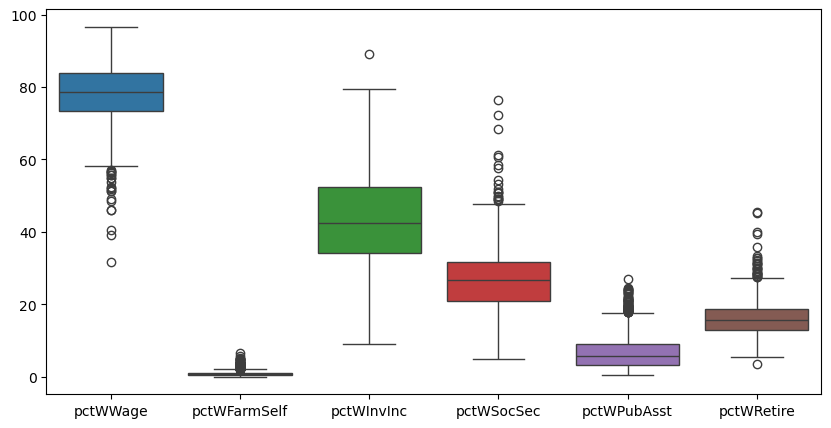

In [12]:
# Ploting the distribution
plt.figure('Income_distribution', figsize=(10, 5))
sns.boxplot(income_sources_df)

- For a general overview, we see that `> 50%` of the population income source is based on wage or salary 
- On the other hand, a small portion (`< 10%`) of the population is self-imployed and approximately `50%` of the population live on investment
- Only `10 to 40%` of the population's income is sourced from social security, public assistance, and retirement 

### Relationships between the Income sources and Various crime rates

In [10]:
# List of various crimes columns
crimes_cols = ['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop',
       'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop',
       'ViolentCrimesPerPop', 'nonViolPerPop']

# Crime DataFrame
crimes_df = rows_drop_df[crimes_cols]
crimes_df.head()
print(crimes_df.shape)

(1902, 10)


In [11]:
# Income source and Crimes DataFrame
income_nd_crimes_df = pd.concat([income_sources_df, crimes_df], axis=1)
income_nd_crimes_df.head()

# Correlation between Income source and Crimes
correlation = income_nd_crimes_df.corr()
correlation.loc[income_sources_cols, crimes_cols]

,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
pctWWage,-0.236009,-0.253694,-0.177964,-0.292483,-0.337251,-0.295113,-0.091887,-0.158671,-0.282628,-0.320191
pctWFarmSelf,-0.115723,-0.043957,-0.221722,-0.073971,-0.082036,-0.026393,-0.212109,-0.085277,-0.139829,-0.081136
pctWInvInc,-0.486762,-0.459882,-0.425216,-0.535448,-0.513961,-0.389202,-0.358361,-0.301118,-0.556591,-0.485941
pctWSocSec,0.071654,0.092871,0.023363,0.127827,0.157592,0.159123,-0.015266,0.025156,0.100893,0.153257
pctWPubAsst,0.504782,0.415710,0.461859,0.519320,0.511955,0.351233,0.366114,0.359940,0.557813,0.460960
pctWRetire,-0.089078,-0.031342,-0.117715,-0.087168,-0.083486,-0.056560,-0.119902,-0.028908,-0.107140,-0.085178


<Axes: >

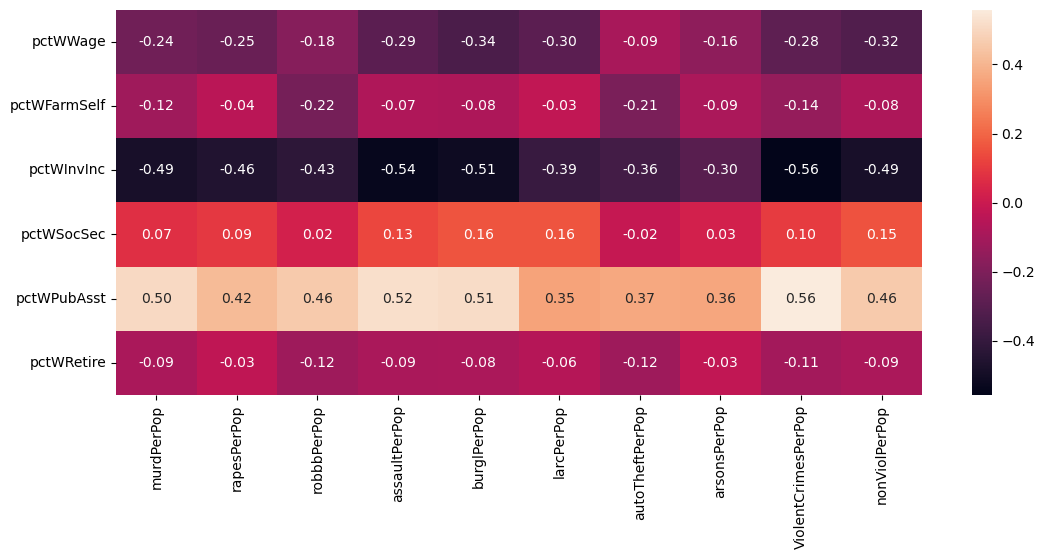

In [15]:
# Ploting the correlation DataFrame as color-encoded matrix with the value in the cells
plt.figure(figsize=(13, 5))
sns.heatmap(correlation.loc[income_sources_cols, crimes_cols], annot=True, fmt='.2f')

From the above display, we can see that: 
- There is a `very weak` relationship (`regardless positive or negative`) between Social Security and Retire based incomes with all crimes
- A `strong positive` relationship between Public Assistance based incomes and murders, assaults, burglaries, and violent crimes
- A `strong negative` relationship between Investment based incomes and assaults, burglaries, and violent crimes

##### The code cell below is to check and update seaborn because all values were not showing in the correlation cells 
`Close and restard the VS Code or Jupyterlab after the update`

In [3]:
# Check installed packages: 
#! conda list

# Upgrading seaborn (previous version 0.12.2 to new version 0.13.2)
#! pip install seaborn --upgrade

# Checking seaborn version
#sns.__version__

# Installing pandoc for nb exportation to pdf
#! pip install pandoc


#### Visualizing the relationships with `regression plot`

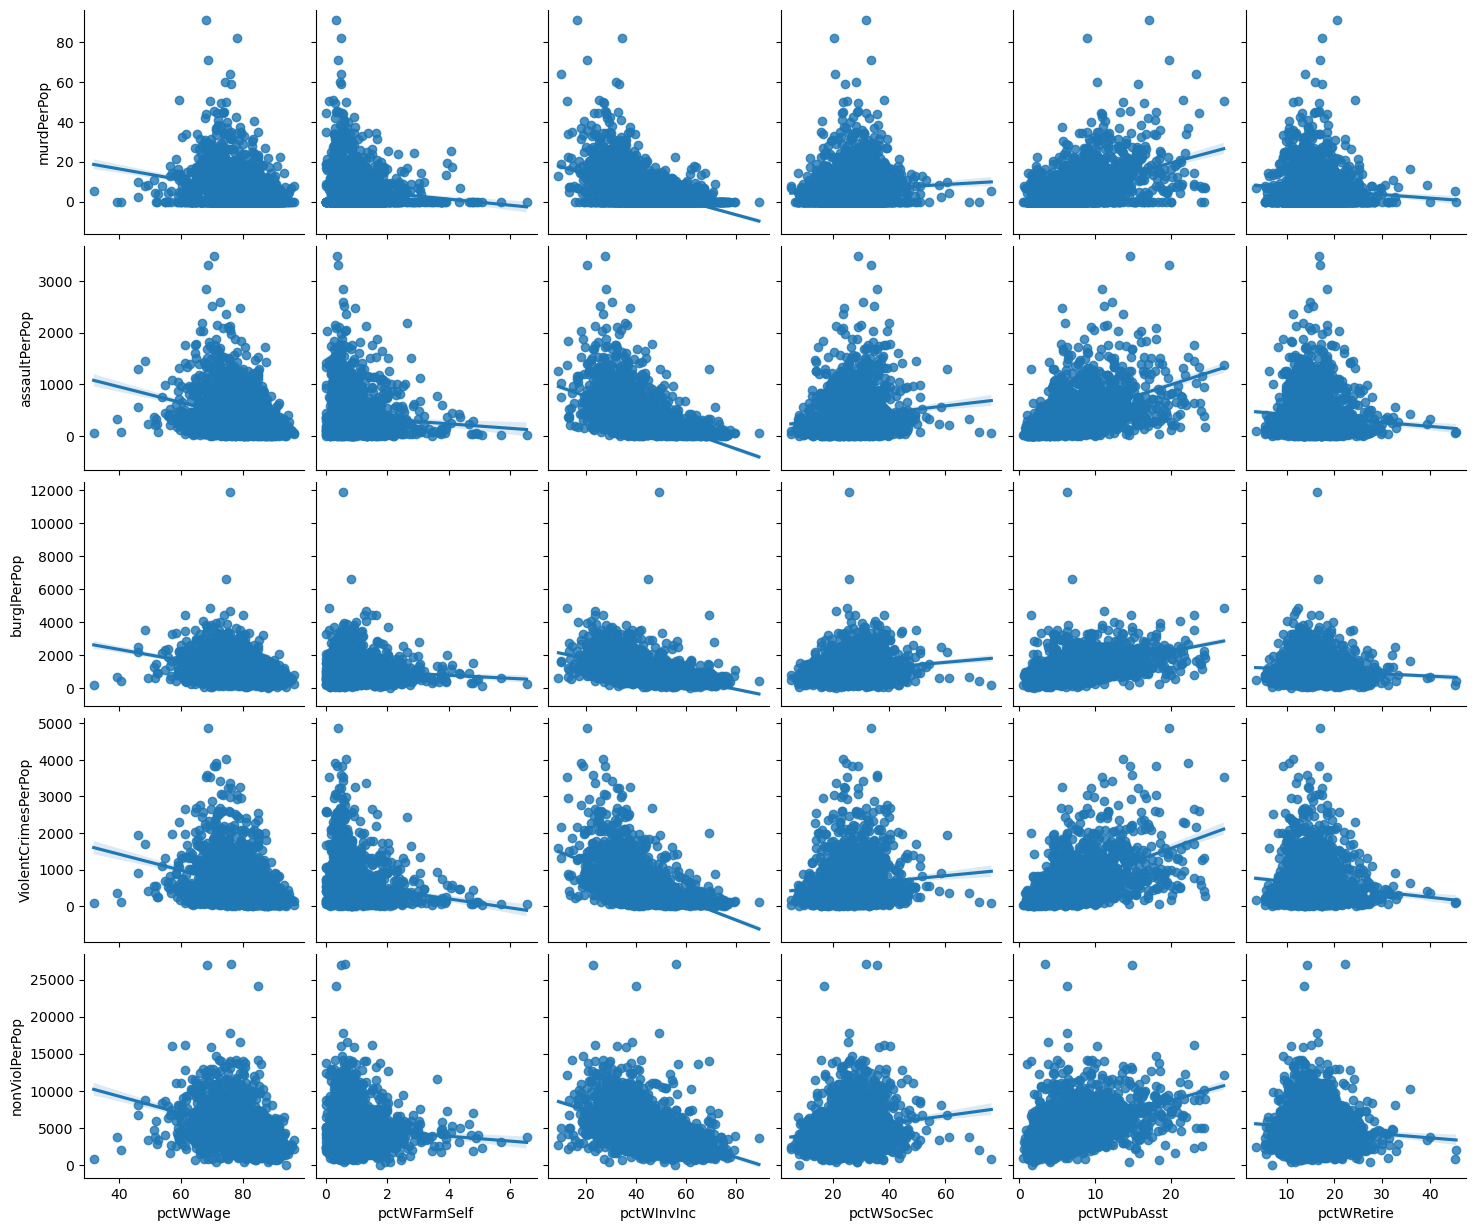

In [17]:
# Overall visualization
sns.pairplot(
    income_nd_crimes_df,
    y_vars=['murdPerPop', 'assaultPerPop',
       'burglPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
    x_vars=income_sources_cols,
    kind='reg'
    )

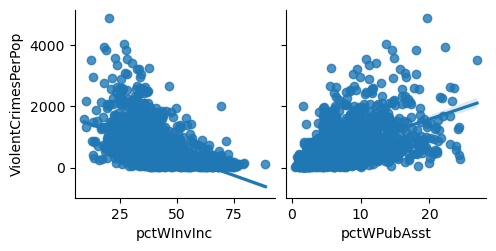

In [18]:
# Comparison of the relation between the percentage of the population with investment income and with poblic assistance income
# and violent crimes
sns.pairplot(
    data=income_nd_crimes_df,
    y_vars=['ViolentCrimesPerPop'],
    x_vars=['pctWInvInc', 'pctWPubAsst'],
    kind='reg'
)

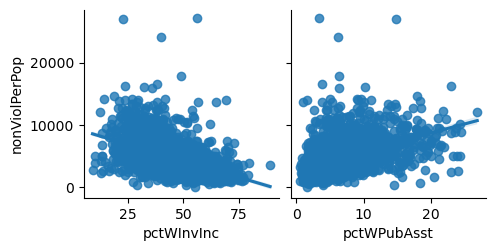

In [19]:
# Comparison of the relation between the percentage of the population with investment income and with poblic assistance income
# and non violent crimes
sns.pairplot(
    data=income_nd_crimes_df,
    y_vars=['nonViolPerPop'],
    x_vars=['pctWInvInc', 'pctWPubAsst'],
    kind='reg'
)

As non violent crime does not mean NO crime, here we can clearly observe that:
- the percentage of crimes reduce as the percentage of people with investment income source augment
- and on the other hand, nomber of crimes goes up as the number of people living on public assistance goes up

In [20]:
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
#ax1
# plot = sns.pairplot(
#     data=income_nd_crimes_df,
#     y_vars=['nonViolPerPop'],
#     x_vars=['pctWInvInc', 'pctWPubAsst'],
#     kind='reg'
# )
# plot.axes

<Axes: xlabel='pctWWage', ylabel='population'>

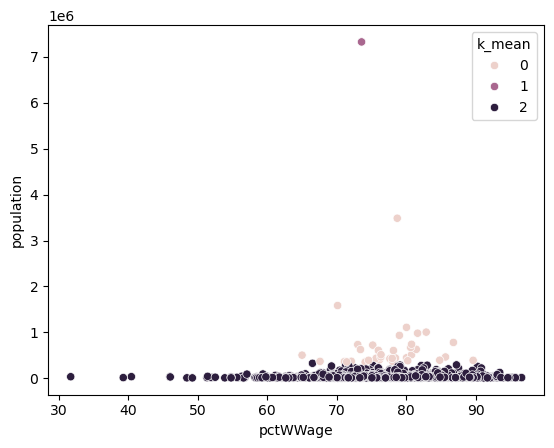

In [69]:
from sklearn.cluster import KMeans
km_cluster = KMeans(n_clusters=3)
#del income_sources_cols[7:]
#income_sources_cols
X_km = rows_drop_df.loc[:,income_sources_cols]
X_km.head()
#income_sources_cols
km_cluster.fit(X_km)
np.unique(km_cluster.labels_)
X_km['k_mean'] = km_cluster.labels_
X_km.head()
sns.scatterplot(data=X_km, y='population', x='pctWWage', hue='k_mean')

## Test of the statistical difference (T-Test) of percentage of households with public assistance income in ten most populated communities in Florida and California

#### Hypotheses
- H0: There is no difference in the avarage population with poblic assistance income in the ten most populated communities in Florida and California
- H1: There is a significant difference in the avarage population with poblic assistance income in the ten most populated communities in Florida and California


In [ ]:
# Data preparation
florida_filter = rows_drop_df['state'] == 'FL'
california_filter = rows_drop_df['state'] == 'CA'

florida_pub_asst_income_df = rows_drop_df[florida_filter].sort_values(by='population', ascending=False).head(10)
california_pub_asst_income_df = rows_drop_df[california_filter].sort_values(by='population', ascending=False).head(10)

florida_pub_asst_income_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,communityname,state
1686,672971.0,2.62,24.35,72.75,1.92,2.58,13.82,28.77,13.88,9.76,...,530.66,1029.08,2227.35,4702.36,1330.05,56.98,1681.08,8316.74,Jacksonvillecity,FL
1874,358548.0,2.75,27.39,65.64,0.63,62.46,12.16,24.63,11.87,14.80,...,1869.98,1871.83,3241.71,8415.45,2951.52,70.50,3829.21,14679.18,Miamicity,FL
166,280015.0,2.44,25.05,70.90,1.35,15.00,13.00,27.51,13.44,13.15,...,1022.83,2112.58,3100.23,6393.64,2922.91,73.82,3235.45,12490.60,Tampacity,FL
1162,164693.0,2.51,26.90,68.76,1.56,8.74,15.77,34.53,18.37,10.06,...,616.20,1563.60,2422.50,6487.65,1005.29,40.63,2304.49,9956.08,Orlandocity,FL
1733,149377.0,2.25,28.11,69.61,0.87,7.15,9.95,23.03,10.44,15.54,...,768.17,588.53,3521.48,8756.53,1890.79,38.11,1421.42,14206.91,FortLauderdalecity,FL
113,124773.0,2.47,29.09,68.24,1.75,3.00,23.68,42.67,28.84,7.94,...,581.91,1292.00,2924.30,7882.35,1521.08,22.10,1981.45,12349.83,Tallahasseecity,FL
1790,121697.0,2.30,8.52,88.25,1.32,11.86,10.21,21.42,9.94,19.95,...,374.31,408.20,1802.21,5437.35,1026.79,16.55,822.70,8282.90,Hollywoodcity,FL
1616,98784.0,2.24,8.97,89.13,1.03,2.92,10.59,21.32,10.25,22.03,...,209.15,874.09,1481.82,4505.63,365.03,38.48,1155.27,6390.96,Clearwatercity,FL
2048,92639.0,1.88,5.18,88.30,1.21,46.79,7.92,20.08,9.08,24.28,...,812.86,1084.90,3250.34,10179.29,2634.14,28.41,1981.89,16092.17,MiamiBeachcity,FL
1972,84770.0,2.66,21.44,73.36,3.94,4.40,25.00,42.46,29.33,8.45,...,412.81,1063.42,2594.62,6951.52,879.46,26.92,1573.82,10452.52,Gainesvillecity,FL


In [ ]:
# Installing pingouin package
#! pip install pingouin 

In [ ]:
# Importing the installed package
import pingouin as pg 

In [ ]:
# T-statistic calculation
t_test = pg.ttest(x=florida_pub_asst_income_df['pctWPubAsst'].values, y=california_pub_asst_income_df['pctWPubAsst'].values)
t_test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.148551,18,two-sided,0.045527,"[-8.24, -0.09]",0.960861,1.809,0.529271


A commonly used significance level (alpha) is `0.05`. This means that if the `p-value` is less than `0.05`, we reject the null hypothesis with a `95%` confidence level. 

However, you can choose a different significance level based on your study's specific requirements.

In [ ]:
# Making the decision base on the p-value
if t_test['p-val'].values[0] < .05:
    print('The null hypothesis (H0) rejected. There is a significant difference in the means percentage of population with public assistance income.')
else:
    print('Failed to reject the null hypothesis. There is no significant difference in the means.')

The null hypothesis (H0) rejected. There is a significant difference in the means percentage of population with public assistance income.


## Analysis with Missing Values Imputed

##### Using Simple Imputation

In [ ]:
# Importing the needed module
from sklearn.impute import SimpleImputer

In [ ]:
# Instantiating the SimpleImputer class
s_imputer = SimpleImputer(strategy='median')

# Imputation return an array, we convert it to a DataFrame with pd.DataFrame
imputed_df = pd.DataFrame(s_imputer.fit_transform(df.drop(columns=['state', 'communityname'])))

# Imputation removes features name
imputed_df.columns = df.drop(columns=['state', 'communityname']).columns

# Adding back state and community features
imputed_df['communityname'] = df['communityname']
imputed_df['state'] = df['state']
imputed_df[cols_w_miss_values].head(10)
df.shape, imputed_df.shape

((2215, 39), (2215, 39))

### Visualising the distributions of income sources

In [ ]:
# Income sources DataFrame
income_sources_imp_df = imputed_df[income_sources_cols]

#income_sources_df.set_index('medIncome', inplace=True)
income_sources_imp_df.head()

,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire
0,89.24,1.55,70.20,23.62,1.03,18.39
1,78.99,1.11,64.11,35.50,2.75,22.85
2,82.00,1.15,55.73,22.25,2.94,14.56
3,68.15,0.24,38.95,39.48,11.71,18.33
4,69.33,0.55,42.82,32.16,11.21,14.43


<Axes: >

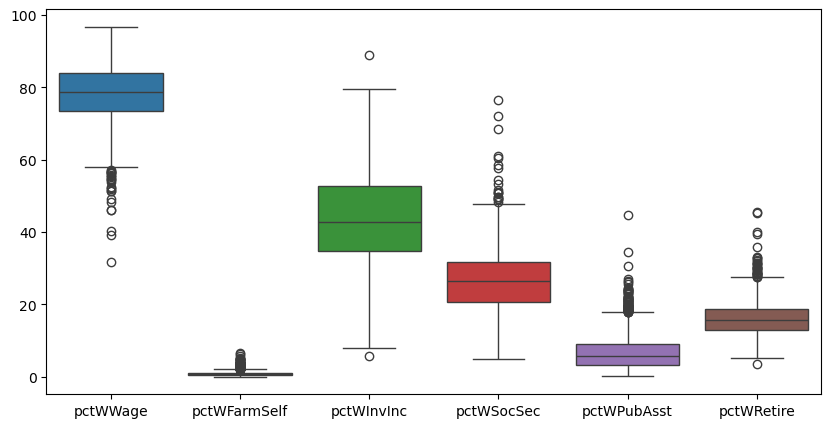

In [ ]:
# Ploting the distribution
plt.figure('Income_distribution', figsize=(10, 5))
sns.boxplot(income_sources_imp_df)

The picture does not seem to have a big difference compare to the plotting with dropped rows

### Relationships between the Income sources and Various crime rates

In [ ]:
# Crime DataFrame
crimes_imp_df = imputed_df[crimes_cols]
crimes_imp_df.head()
print(crimes_imp_df.shape)

(2215, 10)


In [ ]:
# Income source and Crimes DataFrame
income_nd_crimes_imp_df = pd.concat([income_sources_imp_df, crimes_imp_df], axis=1)
income_nd_crimes_imp_df.head()

# Correlation between Income source and Crimes
imp_correlation = income_nd_crimes_imp_df.corr()
imp_correlation.loc[income_sources_cols, crimes_cols]

,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
pctWWage,-0.257061,-0.245432,-0.212433,-0.324209,-0.356570,-0.306285,-0.127156,-0.171489,-0.279318,-0.333536
pctWFarmSelf,-0.127401,-0.050811,-0.233425,-0.098367,-0.098135,-0.042165,-0.225173,-0.100969,-0.136837,-0.089685
pctWInvInc,-0.491301,-0.443493,-0.443728,-0.534308,-0.529623,-0.386454,-0.373825,-0.315379,-0.534563,-0.482246
pctWSocSec,0.082710,0.095349,0.045881,0.146617,0.170724,0.174442,0.013837,0.028515,0.110997,0.170990
pctWPubAsst,0.520787,0.384196,0.494415,0.563179,0.537599,0.353379,0.385562,0.387024,0.507611,0.462340
pctWRetire,-0.069808,-0.027095,-0.085706,-0.051004,-0.060053,-0.034539,-0.077268,-0.018594,-0.085262,-0.053808


<Axes: >

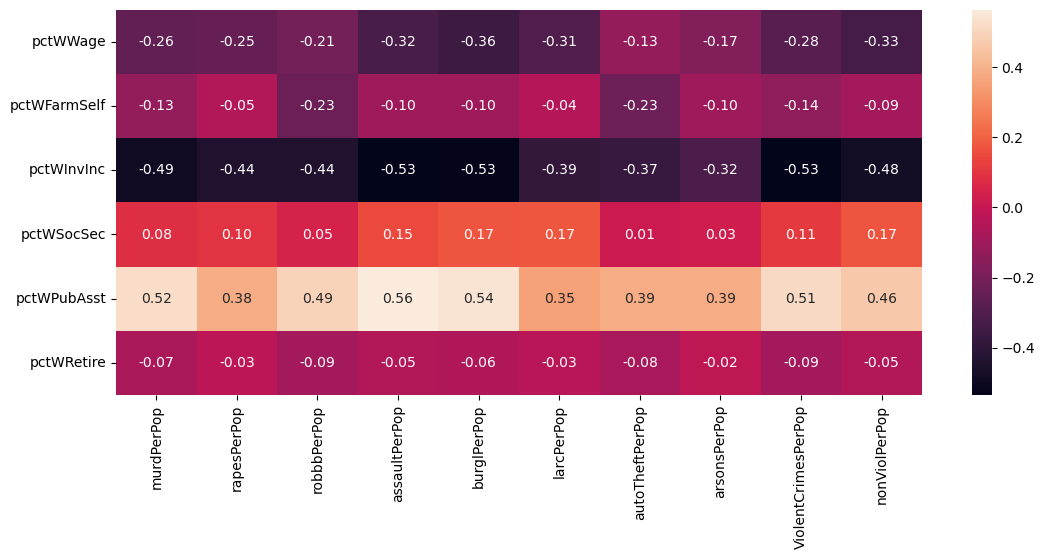

In [ ]:
# Ploting the correlation DataFrame as color-encoded matrix with the value in the cells
plt.figure(figsize=(13, 5))
sns.heatmap(imp_correlation.loc[income_sources_cols, crimes_cols], annot=True, fmt='.2f')